In [27]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

In [28]:
def RemoveOutlier(df,var):
 Q1 = df[var].quantile(0.25)
 Q3 = df[var].quantile(0.75)
 IQR = Q3 - Q1
 high, low = Q3+1.5*IQR, Q1-1.5*IQR
 print("Highest allowed in variable:", var, high)
 print("lowest allowed in variable:", var, low)
 count = df[(df[var] > high) | (df[var] < low)][var].count()
 print('Total outliers in:',var,':',count)
 df = df[((df[var] >= low) & (df[var] <= high))]
 return df

In [29]:
def BuildModel(X, Y):
 # 1. divide the dataset into training and testing  80%train 20%testing
 # 2. Choose the model (linear regression)
 # 3. Train the model using training data
 # 4. Test the model using testing data
 # 5. Improve the performance of the model
 # Training and testing data
 from sklearn.model_selection import train_test_split
 # Assign test data size 20%
 xtrain, xtest, ytrain, ytest =train_test_split(X,Y,test_size= 0.20, random_state=0)       
# Model selection and training
 from sklearn.linear_model import LinearRegression
 model = LinearRegression()
 model = model.fit(xtrain,ytrain)   
     #Training
 #Testing the model & show its accuracy / Performance
 ypred = model.predict(xtest)
 from sklearn.metrics import mean_absolute_error
 print('MAE:',mean_absolute_error(ytest,ypred))
 print("Model Score:",model.score(xtest,ytest))

In [30]:
 df = pd.read_csv('Boston.csv')

In [31]:
print('Information of Dataset:\n', df.info)
print('Shape of Dataset (row x column): ', df.shape)
print('Columns Name: ', df.columns)
print('Total elements in dataset:', df.size)
print('Datatype of attributes (columns):', df.dtypes)
print('First 5 rows:\n', df.head().T)
print('Last 5 rows:\n',df.tail().T)
print('Any 5 rows:\n',df.sample(5).T)

Information of Dataset:
 <bound method DataFrame.info of      Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8

In [32]:
print('Statistical information of Numerical Columns: \n',df.describe().T)

Statistical information of Numerical Columns: 
             count        mean         std        min         25%        50%  \
Unnamed: 0  506.0  253.500000  146.213884    1.00000  127.250000  253.50000   
crim        506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
zn          506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
indus       506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
chas        506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
nox         506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
rm          506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
age         506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
dis         506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
rad         506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
tax         506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
ptra

In [33]:
print('Total Number of Null Values in Dataset:', df.isna().sum())

Total Number of Null Values in Dataset: Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64


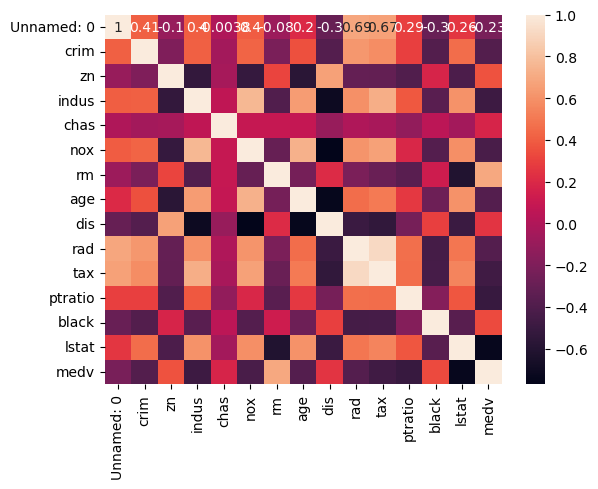

In [34]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [35]:
X = df[['ptratio','lstat']]
Y = df['medv']
BuildModel(X, Y)

MAE: 5.1367091986231115
Model Score: 0.36774580178654837


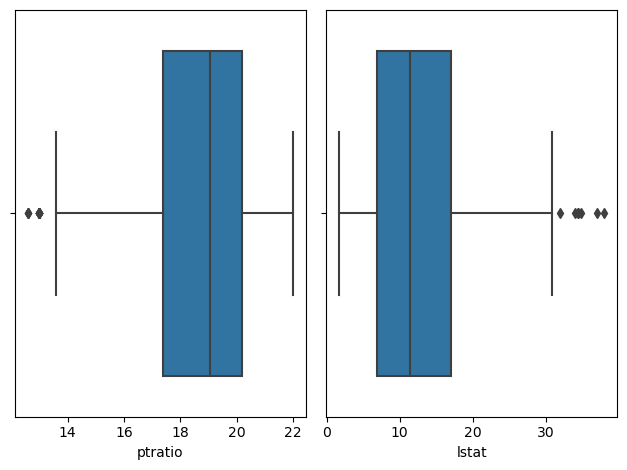

In [36]:
fig, axes = plt.subplots(1,2)
sns.boxplot(data = df, x ='ptratio', ax=axes[0])
sns.boxplot(data = df, x ='lstat', ax=axes[1])
fig.tight_layout()
plt.show()

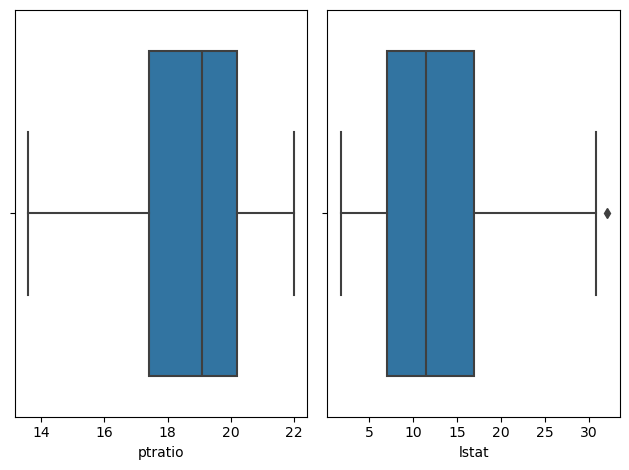

In [38]:
fig, axes = plt.subplots(1,2)
sns.boxplot(data = df, x ='ptratio', ax=axes[0])
sns.boxplot(data = df, x ='lstat', ax=axes[1])
fig.tight_layout()
plt.show()

In [39]:
X = df[['ptratio','lstat']]
Y = df['medv']
BuildModel(X, Y)

MAE: 4.529788999143724
Model Score: 0.5362875680057495


In [42]:
X = df[['rm','lstat', 'ptratio']]
Y = df['medv']
BuildModel(X, Y)

MAE: 4.030709795767343
Model Score: 0.5925717947605273


In [45]:
 df = RemoveOutlier(df, 'lstat')

Highest allowed in variable: lstat 31.79
lowest allowed in variable: lstat -7.889999999999999
Total outliers in: lstat : 0


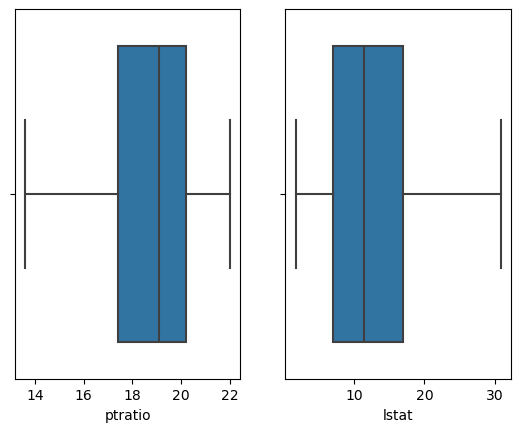

In [46]:
fig, axes = plt.subplots(1,2)
sns.boxplot(data = df, x ='ptratio', ax=axes[0])
sns.boxplot(data = df, x ='lstat', ax=axes[1])
plt.show()